In [1]:
#计算给定数据的香农熵
from math import log
def calShannoEnt(dataSet):
    numEntries=len(dataSet)#计算机数据集中的实例总数，也就是矩阵的函数
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannoEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannoEnt -=prob*log(prob,2)
    return shannoEnt

In [2]:
#创建自己的数据集
def createDataSet():
    dataSet=[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [3]:
myData,label=createDataSet()
myData

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [4]:
calShannoEnt(myData)

0.9709505944546686

In [5]:
#添加更多的分类，熵值越高，混合的数据越多
myData[0][-1]='maybe'#给第一行最后一个数据赋值
myData

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [6]:
calShannoEnt(myData)

1.3709505944546687

In [7]:
#按照给定特征换分数据集
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [8]:
myData

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [9]:
splitDataSet(myData,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [10]:
splitDataSet(myData,0,0)

[[1, 'no'], [1, 'no']]

In [11]:
#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1
    baseEntropy=calShannoEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        uniqueVals=set(featList)
        newEntropy=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*calShannoEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if(infoGain>bestInfoGain):
            bestFeature=i
            bestInfoGain=infoGain
    return bestFeature

In [12]:
myDat,labels=createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [14]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [16]:
labels

['no surfacing', 'flippers']

In [17]:
#多数表决决定叶子结点的分类
import operator
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote in classCount.keys():classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount=sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [19]:
#创建树的函数代码
def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    print(classList)
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [22]:
myDat,labels=createDataSet()
myTree=createTree(myDat,labels)
myTree

['yes', 'yes', 'no', 'no', 'no']
['no', 'no']
['yes', 'yes', 'no']
['no']
['yes', 'yes']


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [26]:
#使用文本注解绘制树节点
import matplotlib.pyplot as plt
decisionNode=dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.8")
arrow_args=dict(arrowstyle="<-")
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',
                           va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)
def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode('Decision Node',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('Leaf Node',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

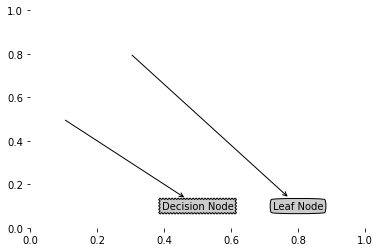

In [27]:
createPlot()